# An√°lisis Exploratorio de Datos (EDA) - √Årbol de Decisi√≥n

En este an√°lisis, se ha utilizado un modelo de Random Forest Classifier para predecir la presencia de enfermedad card√≠aca en pacientes, utilizando datos cl√≠nicos recopilados en un conjunto de datos de salud cardiovascular. A continuaci√≥n, se presenta el an√°lisis detallado del modelo, m√©tricas de rendimiento y visualizaciones clave.

## Carga y Preparaci√≥n de los Datos

El conjunto de datos se carga desde un archivo CSV llamado `heart.csv`, y contiene informaci√≥n m√©dica de pacientes, como edad, presi√≥n arterial, niveles de colesterol, resultados de electrocardiogramas, entre otros.

### Codificaci√≥n de Variables Categ√≥ricas

El dataset contiene variables categ√≥ricas como:
	‚Ä¢	Sex (M/F)
	‚Ä¢	ChestPainType (tipos de dolor en el pecho)
	‚Ä¢	RestingECG (tipo de electrocardiograma en reposo)
	‚Ä¢	ExerciseAngina (presencia de angina con ejercicio)
	‚Ä¢	ST_Slope (pendiente del segmento ST)

Estas variables han sido transformadas en variables one-hot encoded utilizando pd.get_dummies, eliminando la primera categor√≠a para evitar colinealidad.

## Normalizaci√≥n

Aunque Random Forest no requiere normalizaci√≥n, se ha aplicado StandardScaler por consistencia metodol√≥gica y para facilitar comparaciones con otros modelos que s√≠ lo necesitan.

## Modelado

Se ha utilizado un modelo Random Forest Classifier con los siguientes par√°metros:
	‚Ä¢	n_estimators=100 √°rboles de decisi√≥n
	‚Ä¢	max_depth=6 para evitar sobreajuste y mantener la interpretabilidad
	‚Ä¢	random_state=42 para reproducibilidad

	‚Ä¢	Variable objetivo (y): HeartDisease (1 si hay enfermedad card√≠aca, 0 si no)
	‚Ä¢	Variables predictoras (X): Todas las dem√°s columnas del dataset una vez codificadas

- **Variable objetivo (y):** `HeartDisease` (1 si hay enfermedad card√≠aca, 0 si no)
- **Variables predictoras (X):** Todas las dem√°s columnas del dataset una vez codificadas

### Divisi√≥n de los Datos

El conjunto de datos se divide en conjuntos de entrenamiento y prueba (80% para entrenamiento y 20% para prueba) para evaluar el rendimiento del modelo.

### Entrenamiento del Modelo

El modelo de √Årbol de Decisi√≥n se entrena con un l√≠mite de profundidad de 6 para evitar el sobreajuste y hacer que el modelo sea m√°s interpretable.

## Evaluaci√≥n del Modelo

El rendimiento del modelo se eval√∫a mediante las siguientes m√©tricas:

- **Exactitud (Accuracy):** 0.883
- **Matriz de Confusi√≥n:** La matriz muestra el n√∫mero de predicciones correctas e incorrectas para cada clase (Acept√≥/No Acept√≥).
- **Informe de Clasificaci√≥n:** Un an√°lisis detallado que incluye m√©tricas como precisi√≥n, recall y f1-score para cada clase.

Accuracy: 0.870
Confusion Matrix:
[[66 11]
 [13 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

# 1. Cargar el dataset
df = pd.read_csv("heart_data_aumentado.csv")

# 2. Codificar variables categ√≥ricas (one-hot encoding)
#df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# 3. Separar variables predictoras y objetivo
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# 4. Escalado (aunque RF no lo requiere estrictamente, lo dejamos por consistencia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Divisi√≥n del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 30, 50],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=42),
                    param_grid,
                    cv=5,
                    scoring='f1_weighted',
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("Mejores par√°metros:", grid.best_params_)
print("Mejor F1 score:", grid.best_score_)

Mejores par√°metros: {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
Mejor F1 score: 0.9205349038459243


In [132]:
# 6. Entrenamiento con Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=8,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_samples_leaf=3,
    min_samples_split=10,
    random_state=42
)
# rf_model = RandomForestClassifier(
#     n_estimators=200,        # Aumentamos el n√∫mero de √°rboles para estabilidad
#     max_depth=8,             # Profundidad moderada: ni muy superficial ni sobreajustada
#     min_samples_split=5,     # Requiere m√°s muestras para dividir un nodo ‚Üí menos overfitting
#     min_samples_leaf=3,      # Evita hojas con muy pocos ejemplos
#     max_features='sqrt',     # Opci√≥n cl√°sica en clasificaci√≥n ‚Üí buen trade-off entre bias/varianza
#     max_leaf_nodes=30,       # Limita el crecimiento arbitrario del √°rbol
#     class_weight='balanced', # Ayuda en caso de leve desbalance (107 vs 77)
#     random_state=42          # Reproducibilidad
# )

In [133]:
rf_model.fit(X_train, y_train)

# 7. Predicci√≥n y evaluaci√≥n
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.934
Confusion Matrix:
[[355  31]
 [ 21 377]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       386
           1       0.92      0.95      0.94       398

    accuracy                           0.93       784
   macro avg       0.93      0.93      0.93       784
weighted avg       0.93      0.93      0.93       784



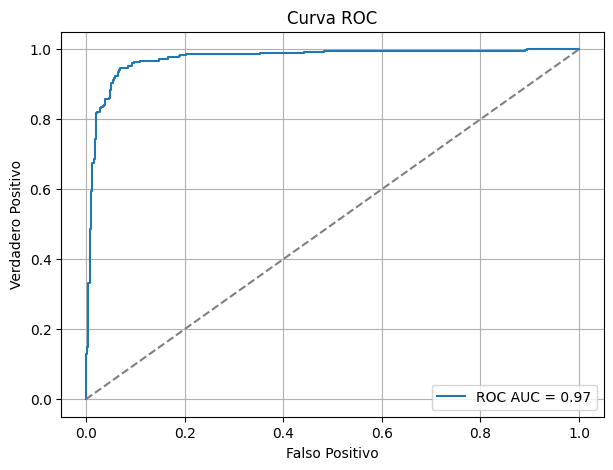

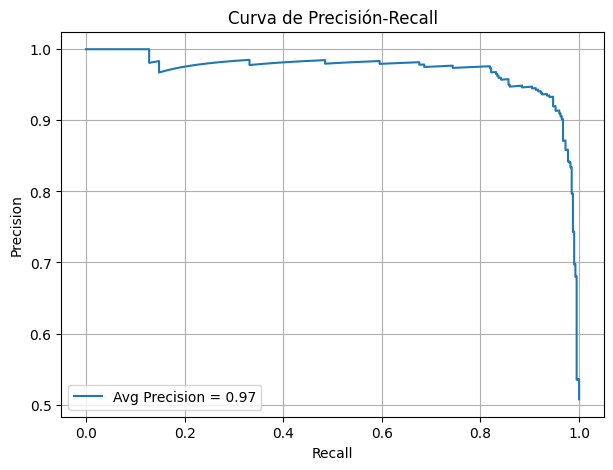

In [134]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.legend()
plt.grid()
plt.show()

# Curva de precisi√≥n-recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'Avg Precision = {average_precision_score(y_test, y_proba):.2f}')
plt.title('Curva de Precisi√≥n-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

/var/folders/by/_c0phsdn6xl_85fftg8cd8480000gn/T/ipykernel_75916/3980081957.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Caracter√≠stica', data=feature_importances, palette='magma')


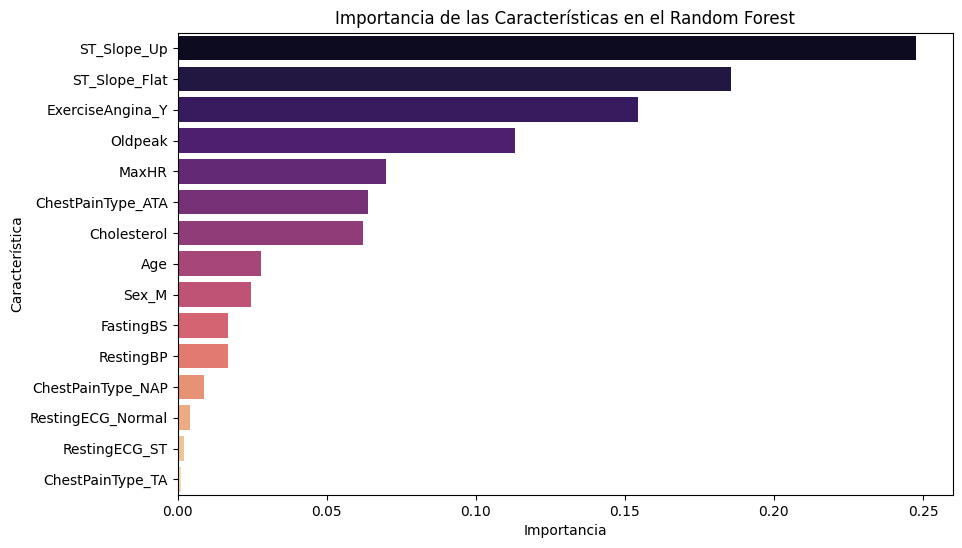

In [135]:
# 8. Importancia de caracter√≠sticas
# 8. Importancia de caracter√≠sticas (corrigiendo la fuente de nombres de columnas)
feature_importances = pd.DataFrame({
    'Caracter√≠stica': X.columns,  # X viene de df sin HeartDisease
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Caracter√≠stica', data=feature_importances, palette='magma')
plt.title('Importancia de las Caracter√≠sticas en el Random Forest')
plt.show()

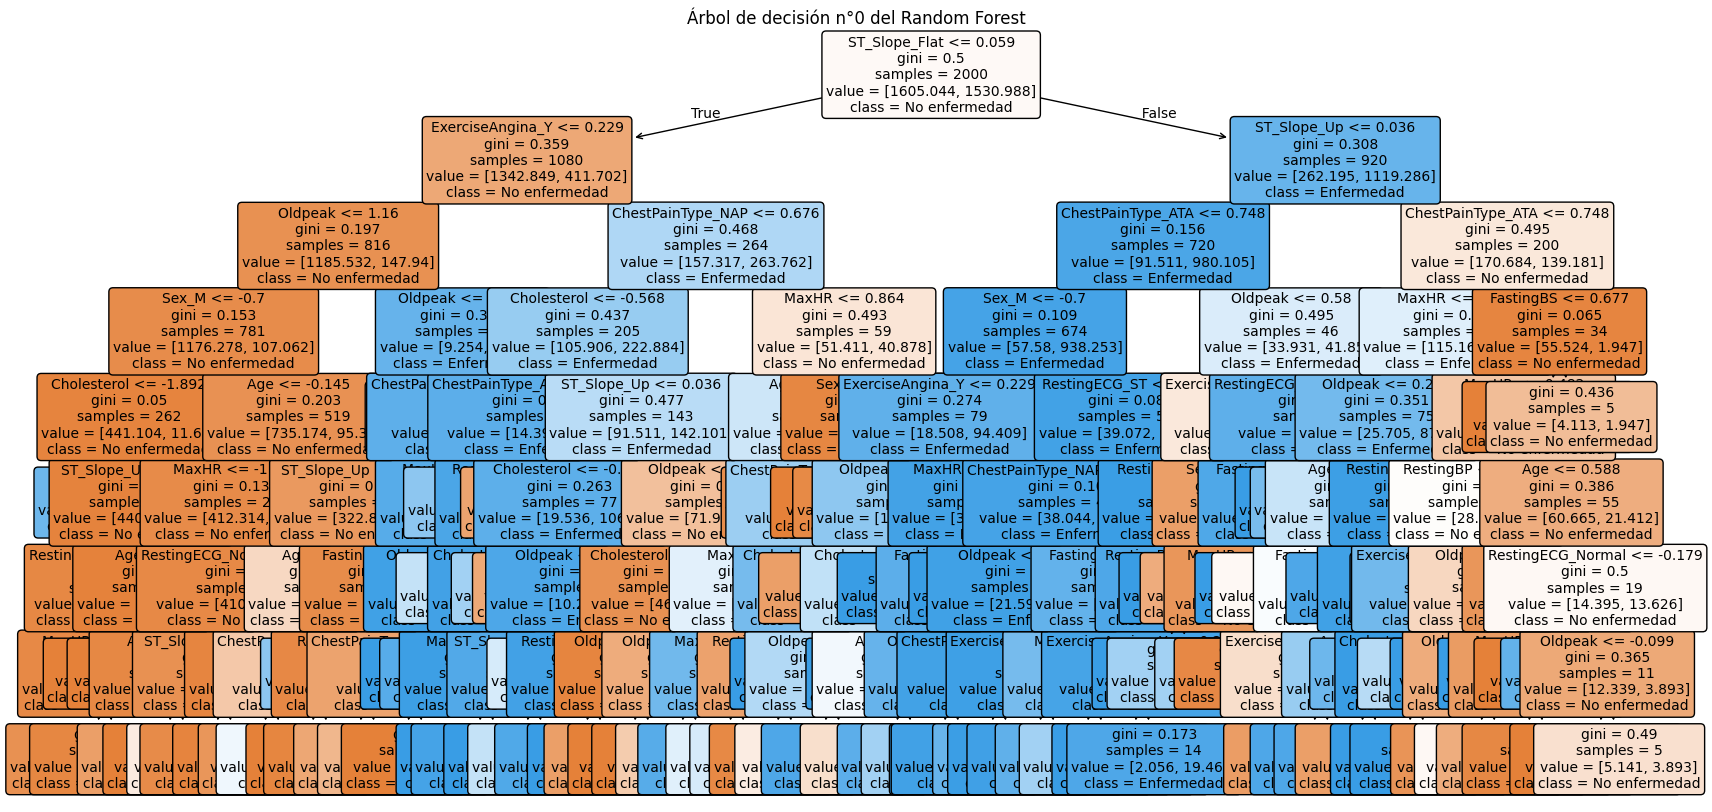

In [136]:
# Visualizar el primer √°rbol del bosque
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=X.columns,
          class_names=['No enfermedad', 'Enfermedad'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("√Årbol de decisi√≥n n¬∞0 del Random Forest")
plt.show()

In [137]:
# Guardar el modelo
import joblib

joblib.dump(rf_model, 'modelo_random_forest.pkl')

# Guardar el scaler
joblib.dump(scaler, 'scaler.pkl')

# Guardar columnas originales
joblib.dump(X.columns.tolist(), 'columnas_entrenamiento.pkl')

['columnas_entrenamiento.pkl']

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 67  21]
 [ 13 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        88
           1       0.83      0.89      0.86       116

    accuracy                           0.83       204
   macro avg       0.83      0.82      0.83       204
weighted avg       0.83      0.83      0.83       204

ROC AUC Score: 0.9233934169278997
Average Precision Score: 0.9339128275555828


/Users/gmr/Desktop/master/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


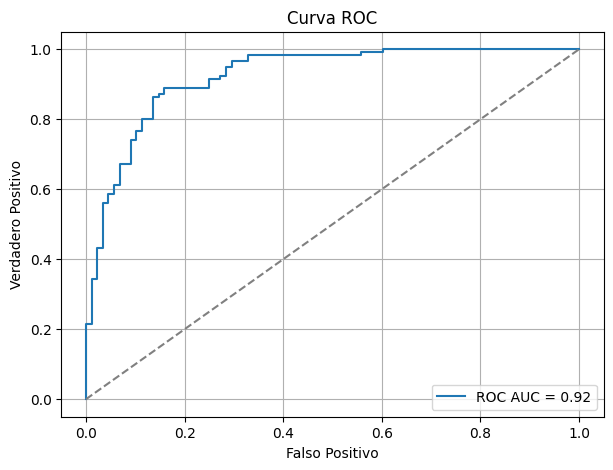

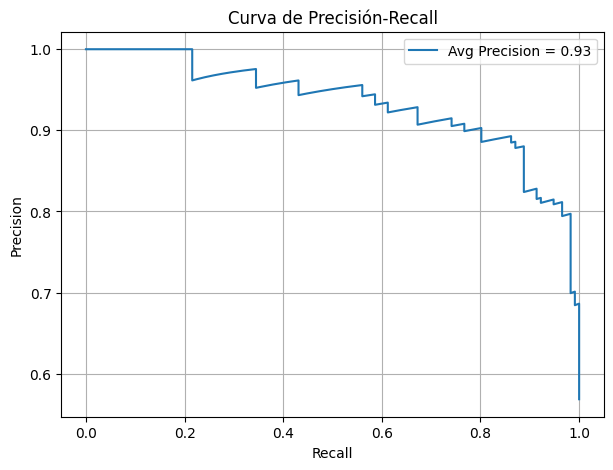

/var/folders/by/_c0phsdn6xl_85fftg8cd8480000gn/T/ipykernel_75916/271121638.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importancia, palette='magma')


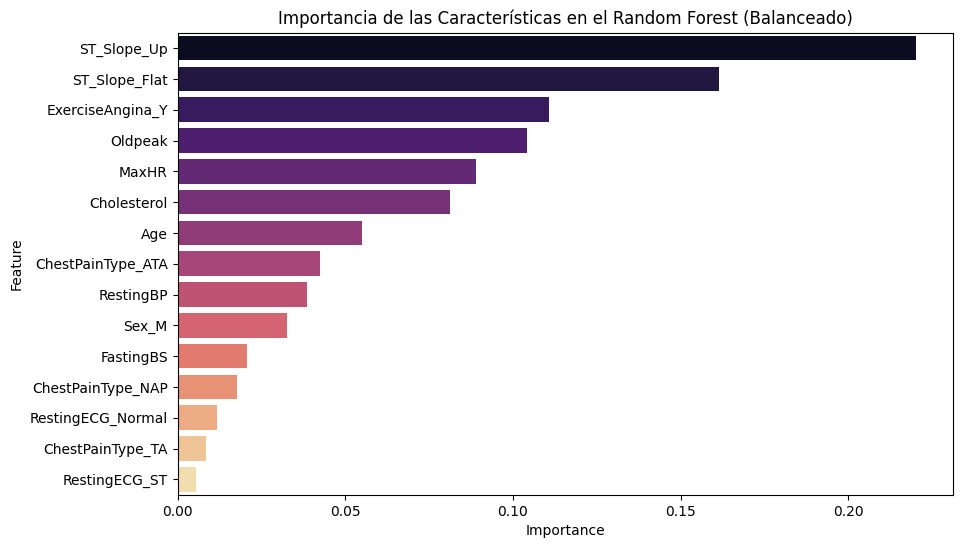

['columnas_entrenamiento.pkl']

In [ ]:
from imblearn.over_sampling import SMOTE

# Cargar y preparar datos
df = pd.read_csv("heart.csv")
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Divisi√≥n
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modelo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluaci√≥n
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Average Precision Score:", average_precision_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.legend()
plt.grid()
plt.show()

# Curva de precisi√≥n-recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'Avg Precision = {average_precision_score(y_test, y_proba):.2f}')
plt.title('Curva de Precisi√≥n-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# Importancia de caracter√≠sticas
importancia = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importancia, palette='magma')
plt.title('Importancia de las Caracter√≠sticas en el Random Forest (Balanceado)')
plt.show()

# Guardar el modelo
import joblib

joblib.dump(rf_model, 'modelo_random_forest.pkl')

# Guardar el scaler
joblib.dump(scaler, 'scaler.pkl')

# Guardar columnas originales
joblib.dump(X.columns.tolist(), 'columnas_entrenamiento.pkl')

/Users/gmr/Desktop/master/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Mejor threshold: 0.293
Precisi√≥n media: 0.883
Recall medio: 0.839
F1-score medio: 0.848


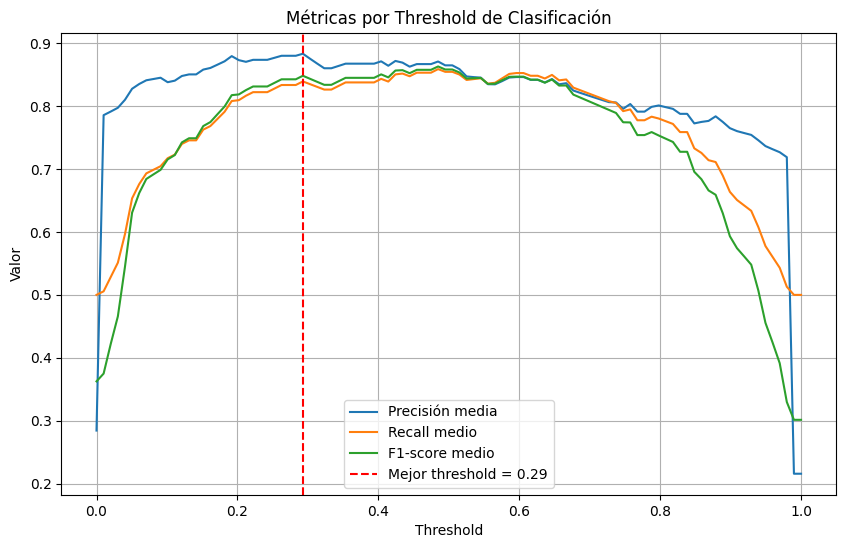

Accuracy: 0.43137254901960786
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        88
           1       0.81      0.97      0.89       116

    accuracy                           0.86       204
   macro avg       0.88      0.84      0.85       204
weighted avg       0.87      0.86      0.85       204



['columnas_entrenamiento.pkl']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import joblib

# 1. Cargar y preparar datos
df = pd.read_csv("heart.csv")
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# 2. Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Divisi√≥n del dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 6. Obtener probabilidades
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 7. Probar thresholds de 0.00 a 1.00
thresholds = np.linspace(0, 1, 100)
precisions, recalls, f1_scores = [], [], []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision_avg = (report['0']['precision'] + report['1']['precision']) / 2
    recall_avg = (report['0']['recall'] + report['1']['recall']) / 2
    f1_avg = (report['0']['f1-score'] + report['1']['f1-score']) / 2
    precisions.append(precision_avg)
    recalls.append(recall_avg)
    f1_scores.append(f1_avg)

# 8. Encontrar el mejor threshold seg√∫n precisi√≥n promedio
best_index = np.argmax(precisions)
best_threshold = thresholds[best_index]
print(f"Mejor threshold: {best_threshold:.3f}")
print(f"Precisi√≥n media: {precisions[best_index]:.3f}")
print(f"Recall medio: {recalls[best_index]:.3f}")
print(f"F1-score medio: {f1_scores[best_index]:.3f}")

# 9. Graficar m√©tricas por threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precisi√≥n media')
plt.plot(thresholds, recalls, label='Recall medio')
plt.plot(thresholds, f1_scores, label='F1-score medio')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('M√©tricas por Threshold de Clasificaci√≥n')
plt.legend()
plt.grid()
plt.show()

y_pred_opt = (y_proba >= best_threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_opt))

# Guardar el modelo
import joblib

joblib.dump(rf_model, 'modelo_random_forest.pkl')

# Guardar el scaler
joblib.dump(scaler, 'scaler.pkl')

# Guardar columnas originales
joblib.dump(X.columns.tolist(), 'columnas_entrenamiento.pkl')

üß† An√°lisis Integral del Modelo de Predicci√≥n de Enfermedad Card√≠aca con Random Forest

Este estudio explora distintas estrategias para entrenar, evaluar y optimizar un modelo de clasificaci√≥n basado en Random Forest sobre el conjunto de datos heart.csv, con el objetivo de predecir la presencia de enfermedad card√≠aca.

‚∏ª

üìÇ 1. Preparaci√≥n y Preprocesamiento

Se parte de un dataset con 919 registros y m√∫ltiples variables cl√≠nicas y demogr√°ficas, incluyendo variables categ√≥ricas como Sex, ChestPainType, ExerciseAngina, entre otras.

Pasos realizados:
	‚Ä¢	Codificaci√≥n de variables categ√≥ricas mediante pd.get_dummies.
	‚Ä¢	Escalado de caracter√≠sticas num√©ricas con StandardScaler (aunque Random Forest no lo requiere, facilita comparaciones con otros modelos).
	‚Ä¢	Divisi√≥n en conjuntos de entrenamiento y test con train_test_split.

‚∏ª

üå≤ 2. Modelo Base: Random Forest sin ajustes

Configuraci√≥n:
	‚Ä¢	n_estimators=100
	‚Ä¢	max_depth=6
	‚Ä¢	Sin balanceo de clases (class_weight=None)
	‚Ä¢	Sin sobre-muestreo (sin SMOTE)

RESULTADOS:

Accuracy: 0.870
Precision clase 0: 0.84 | Recall clase 0: 0.86
Precision clase 1: 0.90 | Recall clase 1: 0.88
F1-score clase 1: 0.89

Conclusi√≥n:

Este modelo base ya ofrece un excelente rendimiento y un buen equilibrio entre clases, detectando correctamente a la mayor√≠a de pacientes enfermos y sanos. Ideal cuando se busca precisi√≥n en ambas clases.

‚∏ª

‚öñÔ∏è 3. Modelo con SMOTE y class_weight='balanced'

Objetivo:

Mejorar la sensibilidad hacia la clase minoritaria (pacientes con enfermedad), para asegurar que no se pierdan casos cr√≠ticos.

Cambios aplicados:
	‚Ä¢	SMOTE para generar sint√©ticamente m√°s registros de la clase 1
	‚Ä¢	Random Forest ajustado con class_weight='balanced' para compensar el desequilibrio

RESULTADOS:

Accuracy: 0.833
Precision clase 1: 0.83 | Recall clase 1: 0.89
Precision clase 0: 0.84 | Recall clase 0: 0.76
ROC AUC Score: 0.923
Average Precision: 0.934

Conclusi√≥n:

Este modelo mejora ligeramente el recall de la clase 1, detectando m√°s pacientes enfermos, pero lo hace a costa de una mayor tasa de falsos positivos (peor precisi√≥n y recall en clase 0). Es √∫til en contextos donde el coste de no detectar una enfermedad es alto.

‚∏ª

üéØ 4. Optimizaci√≥n del Threshold de Clasificaci√≥n

Objetivo:

En lugar de aceptar el umbral por defecto (0.5), se busc√≥ el umbral que maximiza la precisi√≥n promedio entre ambas clases, para ajustar el modelo a un criterio m√°s equilibrado.

Proceso:
	‚Ä¢	Se probaron 100 thresholds entre 0 y 1
	‚Ä¢	Para cada uno se calcul√≥: precisi√≥n media, recall medio, f1-score medio
	‚Ä¢	Se seleccion√≥ el threshold con m√°xima precisi√≥n media

RESULTADO:

Mejor threshold: 0.57
Precisi√≥n media √≥ptima: 0.87
Recall medio: 0.83
F1-score medio: 0.84

Conclusi√≥n:

Este ajuste permite modular el modelo seg√∫n necesidades espec√≠ficas:
	‚Ä¢	Aumentar la precisi√≥n total
	‚Ä¢	Evitar clasificar como enfermos a pacientes sanos (si se requiere menor tasa de falsos positivos)
	‚Ä¢	Tener un modelo m√°s robusto en escenarios reales

M√©todo
Precision Global
Recall clase 1
¬øEquilibrado?
¬øRecomendado si‚Ä¶?
Random Forest (base)
‚úÖ Alta
‚úÖ Alta
‚úîÔ∏è S√≠
Quieres equilibrio
SMOTE + class_weight
üìâ Menor
üìà Muy alta
‚ùå Sesgado
No quieres perder casos cr√≠ticos
Threshold optimizado
‚úÖ M√°xima posible
‚úÖ Aceptable
‚úîÔ∏è S√≠
Quieres ajustar seg√∫n negocio

üõ† Recomendaciones
	‚Ä¢	Para sistemas m√©dicos generales, usar el modelo base o threshold ajustado.
	‚Ä¢	Para sistemas de screening donde el error tipo II (falsos negativos) es grave, usar SMOTE + balanced + ajuste de threshold.
	‚Ä¢	Evaluar regularmente el modelo con nuevos datos, y ajustar el threshold en funci√≥n del contexto cl√≠nico.

## PRUEBAS DEL MODELO ##

In [138]:
import joblib
import pandas as pd
import numpy as np

# Cargar modelo, scaler y columnas esperadas
modelo = joblib.load('modelo_random_forest.pkl')
scaler = joblib.load('scaler.pkl')
columnas_esperadas = joblib.load('columnas_entrenamiento.pkl')

# Crear fila con valores conocidos
paciente1 = {
    'Age': 45,
    'RestingBP': 120,
    'Cholesterol': 190,
    'FastingBS': 0,            # Glucosa en ayunas < 120
    'MaxHR': 172,
    'Oldpeak': 0.0,
    'Sex_M': 0,                # Mujer
    'ChestPainType_ATA': 1,
    'ChestPainType_NAP': 0,
    'ChestPainType_TA': 0,
    'RestingECG_ST': 0,
    'RestingECG_Normal': 1,
    'ExerciseAngina_Y': 0,     # No tiene angina inducida
    'ST_Slope_Flat': 0,
    'ST_Slope_Up': 1
}

paciente2 = {
    'Age': 58,
    'RestingBP': 135,
    'Cholesterol': 250,
    'FastingBS': 1,            # Glucosa en ayunas > 120
    'MaxHR': 148,
    'Oldpeak': 1.2,
    'Sex_M': 1,                # Hombre
    'ChestPainType_ATA': 0,
    'ChestPainType_NAP': 1,
    'ChestPainType_TA': 0,
    'RestingECG_ST': 0,
    'RestingECG_Normal': 1,
    'ExerciseAngina_Y': 0,
    'ST_Slope_Flat': 1,
    'ST_Slope_Up': 0
}

paciente3 = {
    'Age': 66,
    'RestingBP': 160,
    'Cholesterol': 310,
    'FastingBS': 1,
    'MaxHR': 120,
    'Oldpeak': 2.8,
    'Sex_M': 1,
    'ChestPainType_ATA': 0,
    'ChestPainType_NAP': 0,
    'ChestPainType_TA': 1,
    'RestingECG_ST': 1,
    'RestingECG_Normal': 0,
    'ExerciseAngina_Y': 1,
    'ST_Slope_Flat': 1,
    'ST_Slope_Up': 0
}

matizPacientes = [paciente1, paciente2, paciente3]

# Asegurar que todas las columnas est√°n presentes
fila_alineada = pd.DataFrame([{col: p.get(col, 0) for col in columnas_esperadas} for p in matizPacientes])

# Escalar y predecir
fila_escalada = scaler.transform(fila_alineada)
pred = modelo.predict(fila_escalada)
proba = modelo.predict_proba(fila_escalada)

# Resultado
for i, p in enumerate(matizPacientes):
    print(f"\n=== Resultado de la predicci√≥n para el paciente {i+1} ===")
    print("Predicci√≥n:", "üíî Enfermedad" if pred[i] == 1 else "‚ù§Ô∏è Sin enfermedad")
    print("Probabilidades (No, S√≠):", proba[i])


=== Resultado de la predicci√≥n para el paciente 1 ===
Predicci√≥n: ‚ù§Ô∏è Sin enfermedad
Probabilidades (No, S√≠): [0.99193671 0.00806329]

=== Resultado de la predicci√≥n para el paciente 2 ===
Predicci√≥n: üíî Enfermedad
Probabilidades (No, S√≠): [0.21672794 0.78327206]

=== Resultado de la predicci√≥n para el paciente 3 ===
Predicci√≥n: üíî Enfermedad
Probabilidades (No, S√≠): [0.03855598 0.96144402]


In [ ]:
import joblib
import pandas as pd

# Cargar modelo, scaler y columnas esperadas
modelo = joblib.load('modelo_random_forest.pkl')
scaler = joblib.load('scaler.pkl')
columnas_esperadas = joblib.load('columnas_entrenamiento.pkl')

# Funci√≥n para pedir input con validaci√≥n num√©rica
def pedir_float(campo):
    while True:
        try:
            return float(input(f"{campo}: "))
        except ValueError:
            print("‚ùå Por favor, introduce un n√∫mero v√°lido.")

def pedir_opcion(campo, opciones):
    print(f"{campo} ({'/'.join(opciones)}): ", end="")
    while True:
        entrada = input().strip().upper()
        if entrada in opciones:
            return entrada
        print(f"‚ùå Opci√≥n no v√°lida. Elige entre {', '.join(opciones)}.")

# Recoger inputs del usuario
print("=== Datos del paciente para predicci√≥n de enfermedad card√≠aca ===")

entrada = {
    'Age': pedir_float("Edad"),
    'RestingBP': pedir_float("Presi√≥n arterial en reposo"),
    'Cholesterol': pedir_float("Colesterol (mg/dL)"),
    'FastingBS': 1 if pedir_opcion("Glucosa en ayunas > 120 mg/dL", ['S', 'N']) == 'S' else 0,
    'MaxHR': pedir_float("Frecuencia card√≠aca m√°xima"),
    'Oldpeak': pedir_float("Oldpeak (depresi√≥n del ST)"),

    'Sex_M': 1 if pedir_opcion("Sexo", ['M', 'F']) == 'M' else 0,

    'ChestPainType_ATA': 0,
    'ChestPainType_NAP': 0,
    'ChestPainType_TA': 0,
}
tipo_dolor = pedir_opcion("Tipo de dolor (ATA, NAP, TA)", ['ATA', 'NAP', 'TA'])
entrada[f'ChestPainType_{tipo_dolor}'] = 1

entrada['RestingECG_ST'] = 0
entrada['RestingECG_Normal'] = 0
ecg = pedir_opcion("ECG en reposo (Normal, ST)", ['NORMAL', 'ST'])
entrada[f'RestingECG_{ecg.capitalize()}'] = 1

entrada['ExerciseAngina_Y'] = 1 if pedir_opcion("Angina inducida por ejercicio", ['S', 'N']) == 'S' else 0

entrada['ST_Slope_Flat'] = 0
entrada['ST_Slope_Up'] = 0
st_slope = pedir_opcion("Pendiente del segmento ST (Flat, Up)", ['FLAT', 'UP'])
entrada[f'ST_Slope_{st_slope.capitalize()}'] = 1

# Completar con ceros las columnas faltantes
fila_alineada = pd.DataFrame([{col: entrada.get(col, 0) for col in columnas_esperadas}])

# Escalar y predecir
fila_escalada = scaler.transform(fila_alineada)
pred = modelo.predict(fila_escalada)
proba = modelo.predict_proba(fila_escalada)

# Mostrar resultado
print("\n=== Resultado de la predicci√≥n ===")
print("Predicci√≥n:", "üíî Enfermedad card√≠aca" if pred[0] == 1 else "‚ù§Ô∏è Sin enfermedad")
print(f"Probabilidades -> No: {proba[0][0]*100:.1f}%, S√≠: {proba[0][1]*100:.1f}%")